# Figure 1 

In [135]:
options(warn=-1)

In [136]:
library_load <- suppressMessages(
    
    suppressWarnings(
        
        list(
        
            # Seurat 
            library(Seurat), 

            # Data 
            library(tidyverse), 
            library(data.table), 

            # miloR
            library(miloR), 
            library(ggbeeswarm), 

            # Plotting 
            library(ggplot2), 
            library(patchwork), 
            library(cowplot), 
            library(ComplexHeatmap), 

            # Pyhton compatibility
            library(reticulate)

        )
    )
)

In [137]:
# Configure reticulate 
# use_condaenv(condaenv="p.3.10.16-FD20200109SPLENO", conda="/nobackup/peer/fdeckert/miniconda3/bin/conda", required=NULL)
# py_config()

In [138]:
random_seed <- 42
set.seed(random_seed)

In [139]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [140]:
# Plotting Theme
source("plotting_global.R")
ggplot2::theme_set(theme_global_set(size_select=4)) # From project global source()

In [141]:
# Helper functions
source("bin/dea_pl.R")
source("bin/dea_stats.R")
source("bin/so_pl.R")
source("bin/dp_feature.R")
source("bin/grn_pl.R")

# Import data 

In [149]:
so <- readRDS("data/scRNAseq/object/pp_0.rds")
so <- NormalizeData(so)

Normalizing layer: counts



In [150]:
so$sample_group <- factor(so$sample_group, levels=c("Bl6_NaCl_D6", "Bl6_CpG_D6"))

# Compute percentage primitive and definitive hemoglobin 

In [151]:
so <- PercentageFeatureSet(
    so,
    features = c("Hba-x", "Hbb-y", "Hbb-bh1"),
    col.name="pct_counts_primitive_HB", 
    assay = "RNA"
)

In [152]:
so <- PercentageFeatureSet(
    so,
    features = c("Hba-a1", "Hba-a2", "Hbb-bt", "Hbb-bs"),
    col.name="pct_counts_definitive_HB", 
    assay = "RNA"
)

# UMAP leiden celltype low

In [153]:
dp_1 <- dplot(so, group_by="celltype_low", alpha=1.0, pt_size=0.25, shuffle=TRUE, size_select=4, label=TRUE, label_box=TRUE, label_size=6) + 

    scale_color_manual(values=color$celltype_low) + 
    scale_fill_manual(values=color$celltype_low) + 
    guides(color=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0, keyheight=0.25, default.unit="cm")) + 
    theme(
    
        legend.text.align=0
    
    ) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [154]:
pdf("result/figures/figure_1/umap_celltype_low.pdf", width=3.5, height=2.5)

dp_1

dev.off()

pdf 
  2

# UMAP FACS

In [155]:
so$facs <- factor(so$facs, levels=c("Progenitor", "Myeloid"))

In [156]:
dp_1 <- dplot(so, group_by="facs", alpha=1.0, pt_size=0.25, shuffle=FALSE, size_select=4, label=FALSE, label_box=FALSE, label_size=6) + 

    scale_color_manual(values=color$facs) + 
    scale_fill_manual(values=color$facs) + 
    guides(color=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0, keyheight=0.25, default.unit="cm")) + 
    theme(
    
        legend.text.align=0
    
    ) 

In [157]:
pdf("result/figures/figure_1/umap_facs.pdf", width=3.5, height=2.5)

gridExtra::grid.arrange(
    
    dp_1 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm"))

)

dev.off()

pdf 
  2

# UMAP Ctr vs CpG

In [158]:
so_tmp <- so

In [159]:
color_tmp <- color$sample_group
color_tmp["Bl6_CpG_D6"] <- "#7F7F7F"

In [160]:
data <- cbind(so_tmp[["umap"]]@cell.embeddings, so_tmp@meta.data)
data <- data[data$sample_group=="Bl6_NaCl_D6", ]

In [161]:
dp_1 <- dplot(so_tmp, group_by="sample_group", alpha=1, pt_size=0.25, shuffle=FALSE, size_select=4, order=c("Bl6_NaCl_D6", "Bl6_CpG_D6")) + 
    scale_color_manual(values=color_tmp) + 
    guides(color=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0, keyheight=0.25, default.unit="cm")) + 
    stat_density_2d(data=data, aes(x=UMAP_1, y=UMAP_2), color="black", size=0.2, adjust=0.5, n=100, contour=TRUE) + 
    theme(legend.text.align=0) 

In [162]:
pdf("result/figures/figure_1/umap_wt_nacl_d6.pdf", width=2.5, height=2.5)

gridExtra::grid.arrange(
    
    dp_1 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm"))

)

dev.off()

pdf 
  2

In [163]:
so_tmp <- so

In [164]:
color_tmp <- color$sample_group
color_tmp["Bl6_NaCl_D6"] <- "#7F7F7F"

In [165]:
data <- cbind(so_tmp[["umap"]]@cell.embeddings, so_tmp@meta.data)
data <- data[data$sample_group=="Bl6_CpG_D6", ]

In [166]:
dp_1 <- dplot(so_tmp, group_by="sample_group", alpha=1, pt_size=0.25, shuffle=FALSE, size_select=4, order=c("Bl6_CpG_D6", "Bl6_NaCl_D6")) + 
    scale_color_manual(values=color_tmp) + 
    guides(color=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0, keyheight=0.25, default.unit="cm")) + 
    stat_density_2d(data=data, aes(x=UMAP_1, y=UMAP_2), color="black", size=0.2, adjust=0.5, n=100, contour=TRUE) + 
    theme(legend.text.align=0) 

In [167]:
pdf("result/figures/figure_1/umap_wt_cpg_d6.pdf", width=2.5, height=2.5)

gridExtra::grid.arrange(
    
    dp_1 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm"))

)

dev.off()

pdf 
  2

# Barplot FACS ratio per celltype

In [168]:
bp_1 <- ggplot(so@meta.data %>% dplyr::mutate(celltype_low=factor(celltype_low, levels=rev(levels(celltype_low)))), aes(x=celltype_low, fill=facs)) + 
    geom_bar(position="fill", width=0.8, color="black", size=0.1) + 
    scale_fill_manual(values=color$facs) + 
    ggtitle("") + xlab("") + ylab("Celltype [ratio]") + 
    coord_flip() +
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1)) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

In [169]:
pdf("result/figures/figure_1/bp_facs_celltype_low.pdf", width=2.5, height=2.5)

bp_1

dev.off()

pdf 
  2

# Barplot celltype ratio  

In [170]:
so$celltype_high <- ifelse(so$celltype_low %in% c("MEP", "Proerythroblast", "Erythroblast"), "E", ifelse(so$celltype_low %in% c("MegP", "GMP", "NeuP", "BasoP", "MastP"), "P", "M"))

In [171]:
so$sample_group_rep <- factor(so$sample_group_rep, levels=c("Bl6_NaCl_D6_Rep1", "Bl6_NaCl_D6_Rep2", "Bl6_CpG_D6_Rep1",  "Bl6_CpG_D6_Rep2" ))

In [172]:
bp_1 <- ggplot(so@meta.data[so$celltype_high=="E", ], aes(x=sample_group_rep, fill=celltype_low)) + 
    geom_bar(position="fill", width=0.8, color="black", size=0.1) + 
    scale_fill_manual(values=color$celltype_low) + 
    ggtitle("") + xlab("") + ylab("Celltype [ratio]") + 
    facet_wrap(~celltype_high, scales="free", ncol=1) + 
    scale_x_discrete(labels=c("Rep1", "Rep2", "Rep1", "Rep2")) + 
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1)) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

bp_2 <- ggplot(so@meta.data[so$celltype_high=="P", ], aes(x=sample_group_rep, fill=celltype_low)) + 
    geom_bar(position="fill", width=0.8, color="black", size=0.1) + 
    scale_fill_manual(values=color$celltype_low) + 
    ggtitle("") + xlab("") + ylab("Celltype [ratio]") + 
    facet_wrap(~celltype_high, scales="free", ncol=1) + 
    scale_x_discrete(labels=c("Rep1", "Rep2", "Rep1", "Rep2")) +
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1)) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

bp_3 <- ggplot(so@meta.data[so$celltype_high=="M", ], aes(x=sample_group_rep, fill=celltype_low)) + 
    geom_bar(position="fill", width=0.8, color="black", size=0.1) + 
    scale_fill_manual(values=color$celltype_low) + 
    ggtitle("") + xlab("") + ylab("Celltype [ratio]") + 
    facet_wrap(~celltype_high, scales="free", ncol=1) + 
    scale_x_discrete(labels=c("Rep1", "Rep2", "Rep1", "Rep2")) +
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1)) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

In [173]:
pdf("result/figures/figure_1/bp_celltype_low.pdf", width=2, height=4)

gridExtra::grid.arrange(

    bp_1 %>% egg::set_panel_size(., width=unit(4*0.3, "cm"), height=unit(2.0, "cm")),
    bp_2 %>% egg::set_panel_size(., width=unit(4*0.3, "cm"), height=unit(2.0, "cm")),
    bp_3 %>% egg::set_panel_size(., width=unit(4*0.3, "cm"), height=unit(2.0, "cm")), ncol=1
        
)

dev.off()

pdf 
  2

# Celltype marker genes

In [206]:
marker_genes=data.frame(

    celltype=c(
        
        "Prog.", "Prog.", "Prog.", "Prog.", "Prog.",

        "NeuP", 
               
        "Baso.", "Baso.", "Baso.", "Baso.", 
               
        "Mast", "Mast", 

        "MegP", "MegP", 
               
        "Erythroid", "Erythroid", "Erythroid", "Erythroid", "Erythroid", "Erythroid", "Erythroid", "Erythroid", "Erythroid", 
               
        "Mono.", "Mono.", "Mono.", "Mono.", 
               
        "RPM", "RPM", "RPM", 
               
        "cDC", "cDC", "cDC", "cDC", "cDC", "cDC", "cDC"
               
    ), 
    
    genes=c(
        
        "Hlf", "Cd34", "Kit", "Meis1", "Spi1",  

        "Elane", 
            
        "Cebpa", "Mcpt8", "Clec12a", "Itga2", 
            
        "Mcpt4", "Cma1", 

        "Pf4", "Itga2b",
            
        "Gata2", "Gata1", "Klf1", "Icam4", "Epor", "Sox6", "Tfrc", "Alas2", "Slc4a1",
            
        "Ly6c2", "Ccr2", "Cx3cr1", "Itgam",
            
        "Adgre1", "Spic", "Cd163",  
            
        "Sirpa", "Flt3", "Xcr1", "Cd8a", "Cd4", "Cd209a", "Ccr7"
    
    )
    
)

In [207]:
dp_1 <- dp_feature(so, marker_genes$genes, group_by="celltype_low", group_by_order=rev(levels(so$celltype_low)), split=marker_genes$celltype, split_order=unique(marker_genes$celltype), range_max=2.5) + 
    scale_y_discrete(labels=rev(levels(so$celltype_low))) + theme_global_set(4) + 

        theme(
            legend.position="bottom", 
            panel.spacing=unit(0.1, "lines"), 
            axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, face="italic"),
            axis.text.y=element_text(angle=0, vjust=0.5, hjust=1), 
            strip.text.x=element_text(angle=90, vjust=0.5, hjust=0), 
            strip.text=element_text(margin=margin(0.1, 0.1, 0.1, 0.1, "lines")), 
            strip.background=element_rect(fill="transparent", color=NA), 
            legend.key.size=unit(0.25, "cm"), 
            legend.key.height=unit(0.25, "cm"), 
            legend.key.width=unit(0.25, "cm")
            
        )

`summarise()` has grouped output by 'celltype_low'. You can override using the
`.groups` argument.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [208]:
pdf("result/figures/figure_1/dp_celltype_low_marker_genes.pdf", width=4.0, height=3.2)

dp_1

dev.off()

pdf 
  2

[[1]]

[[2]]


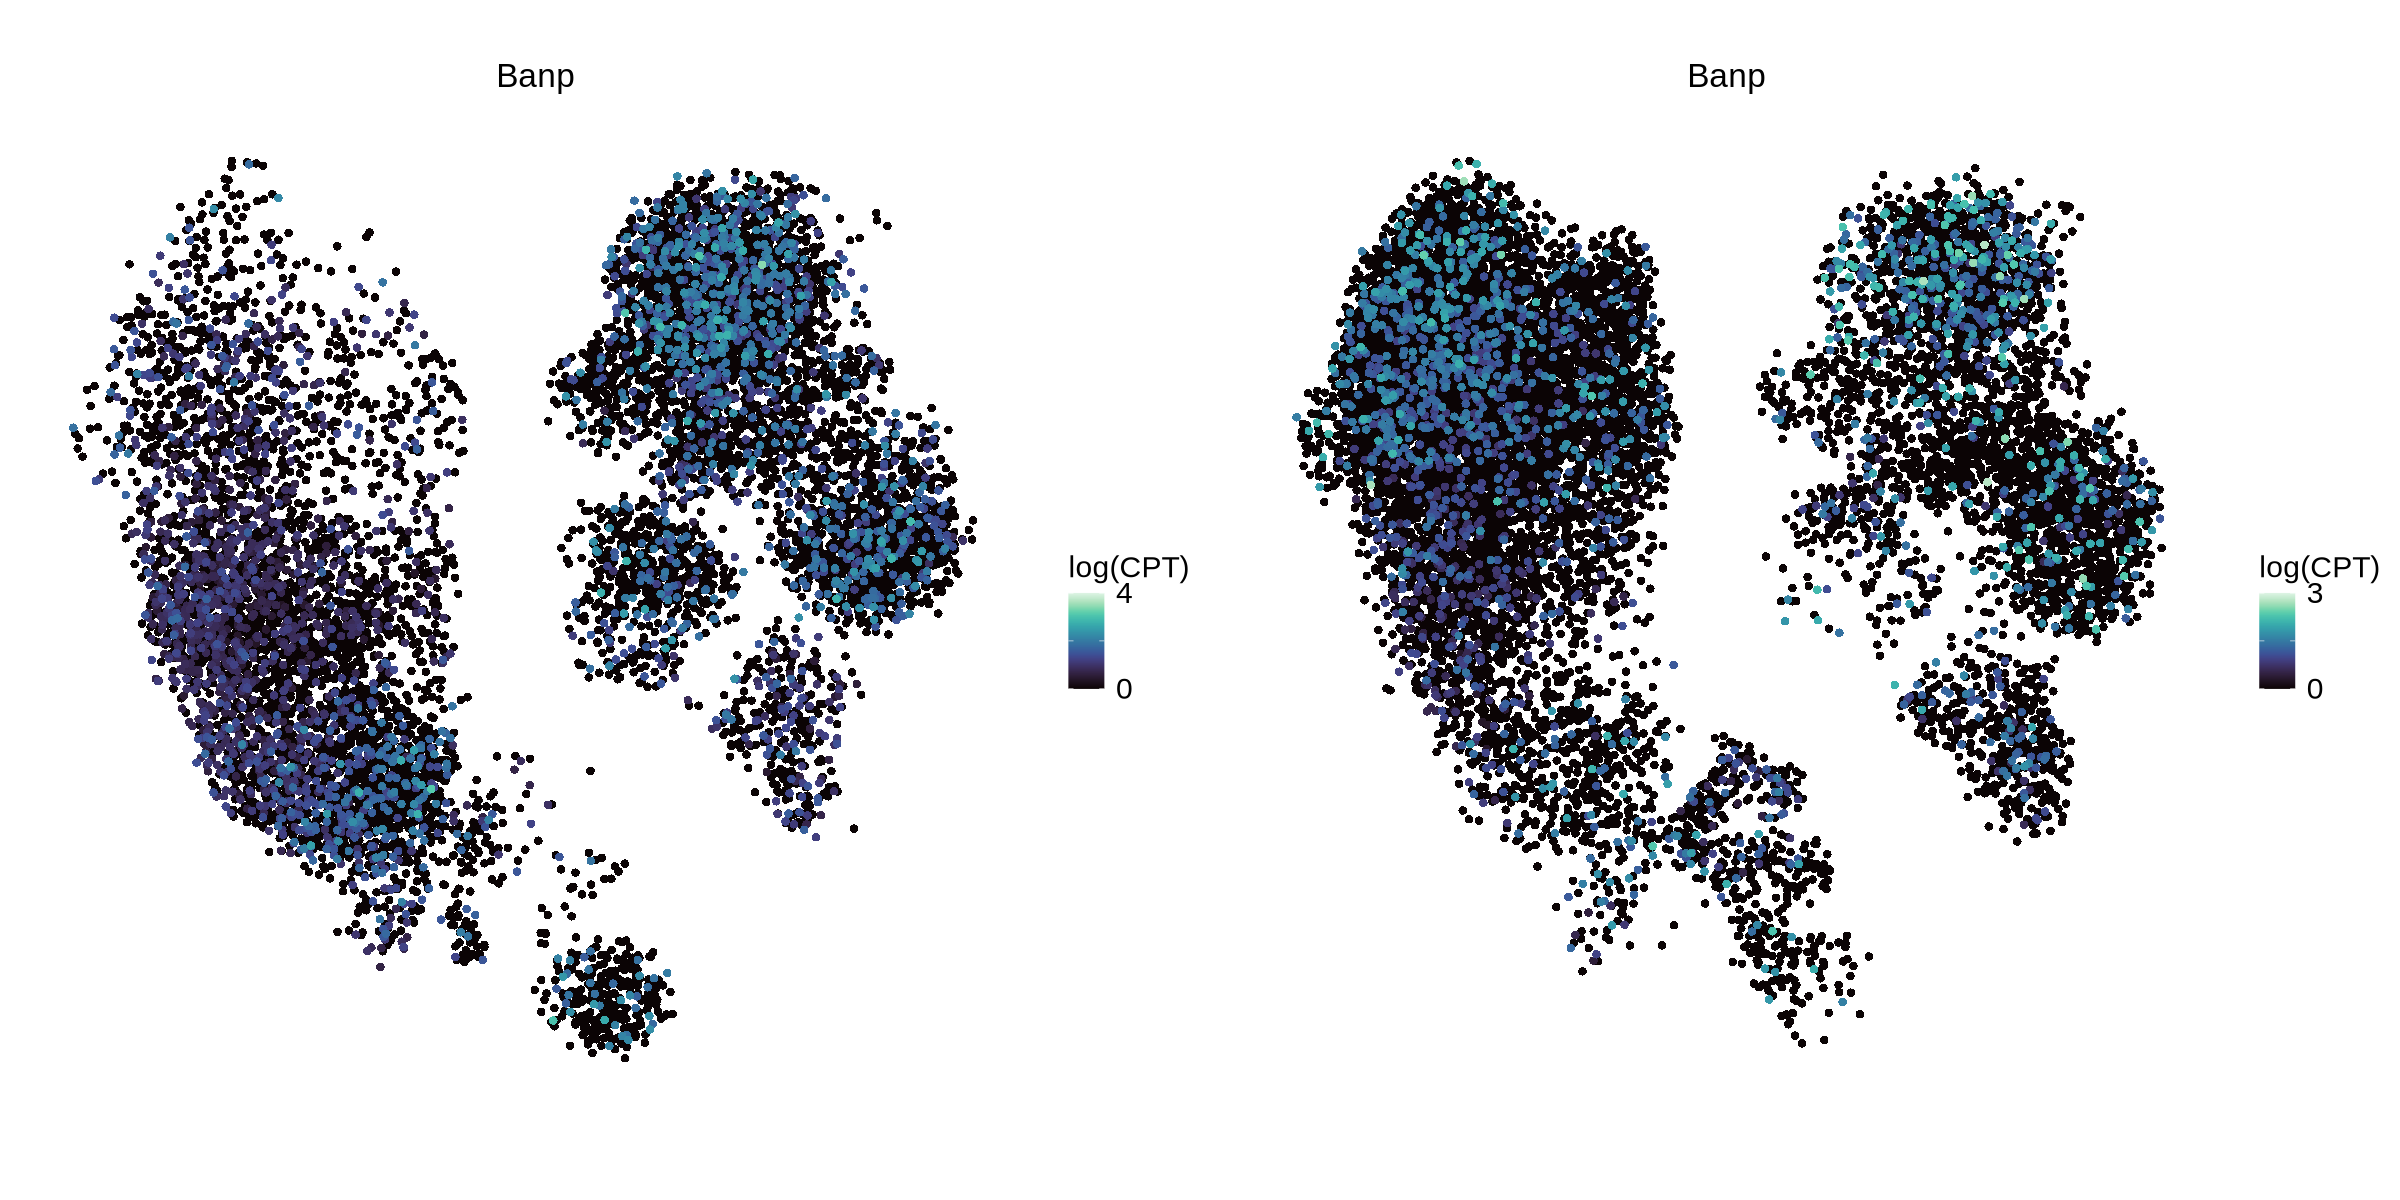

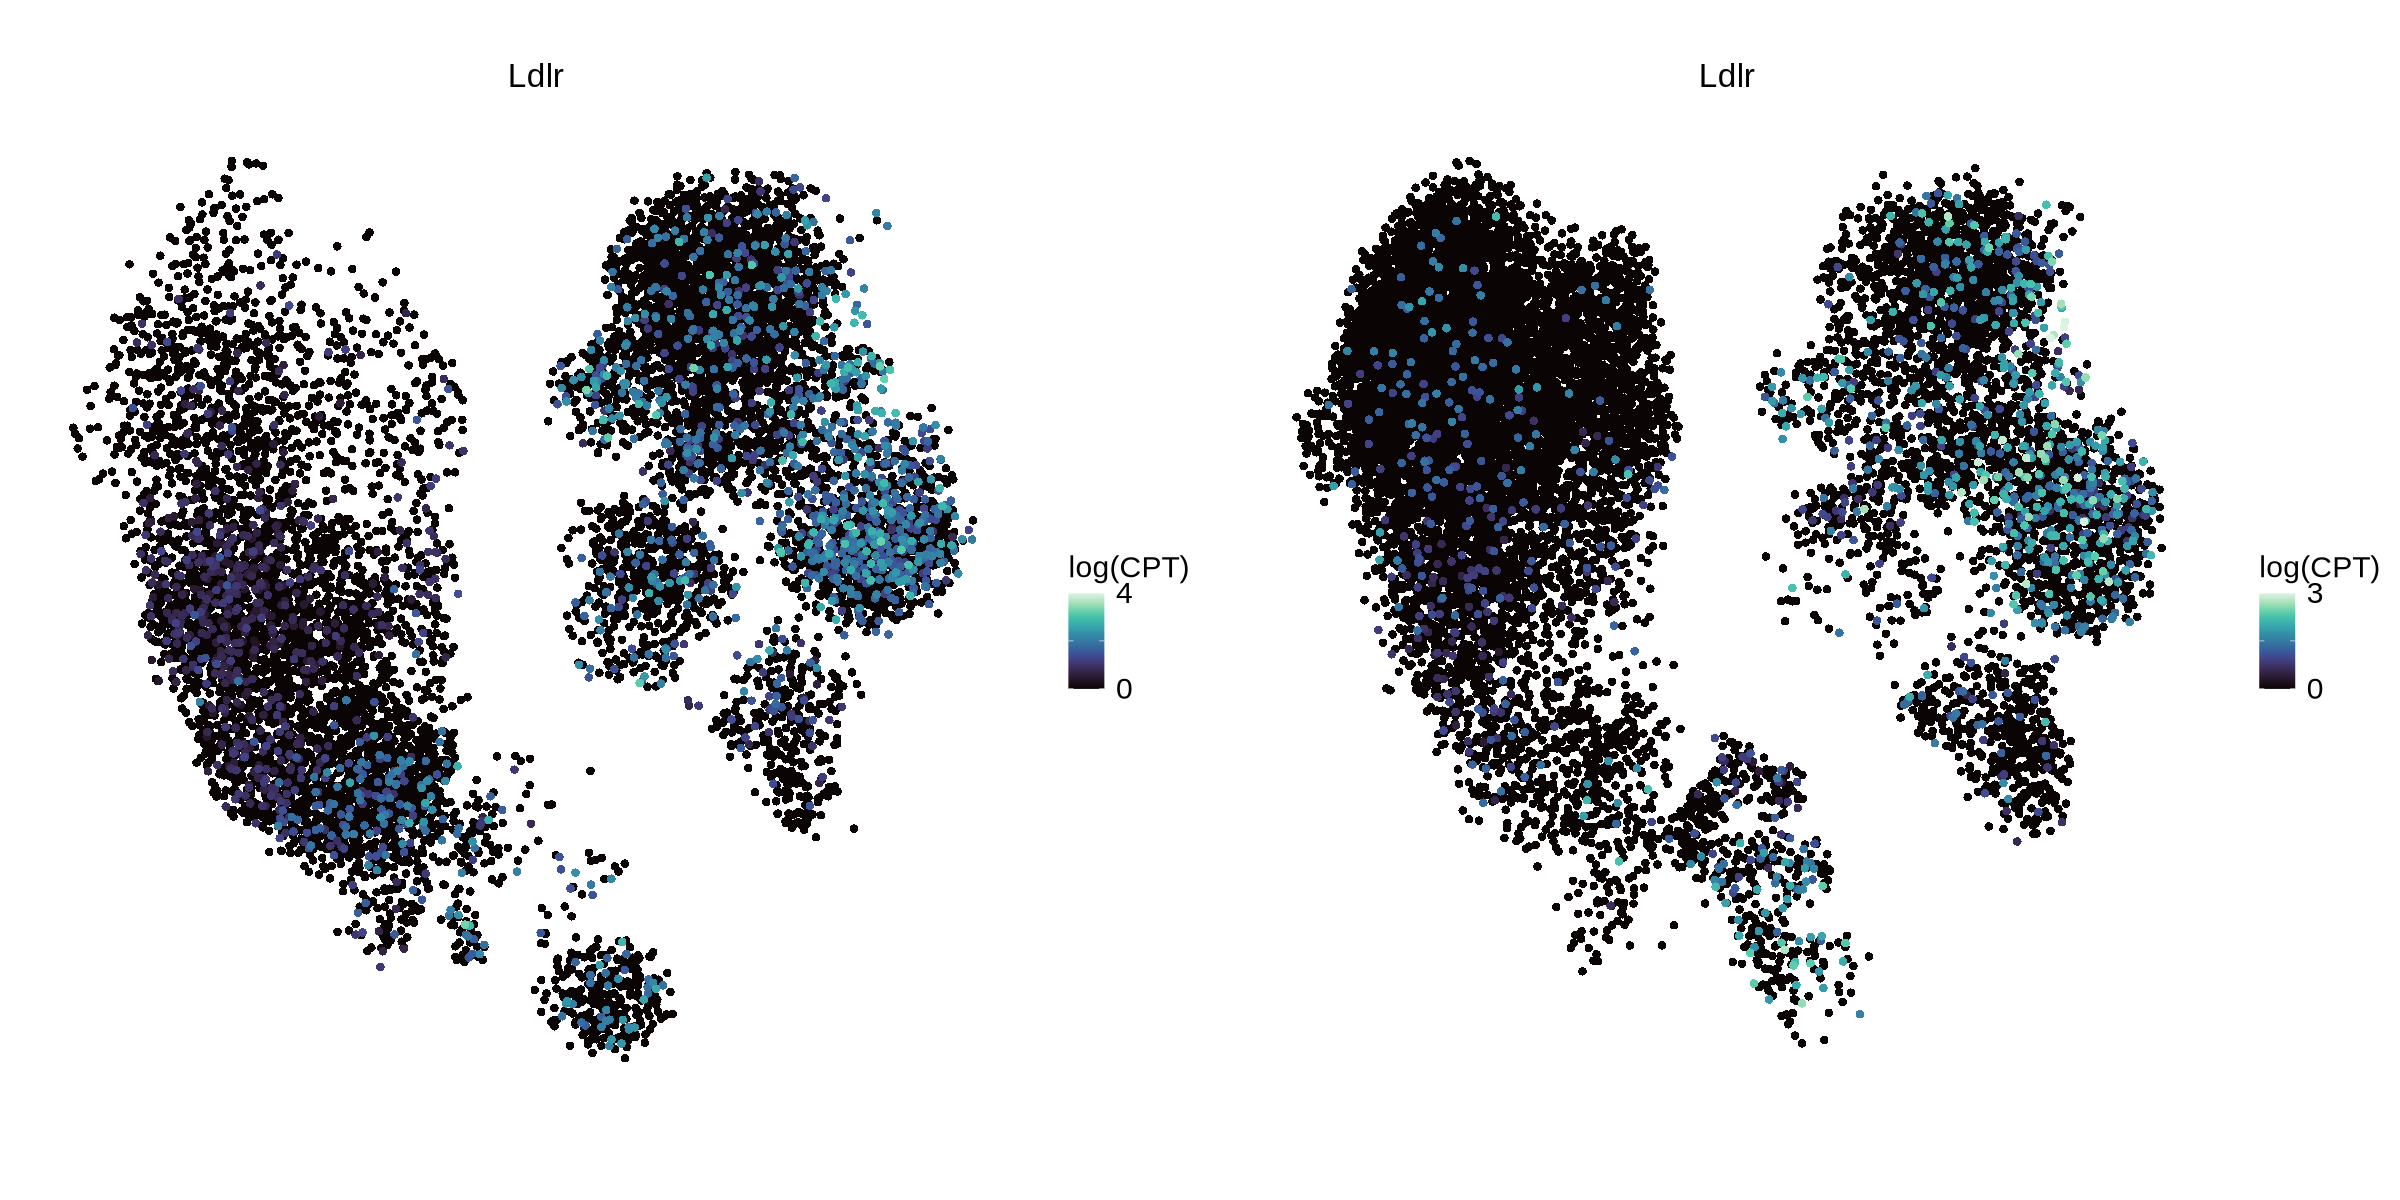

In [226]:
lapply(c("Banp", "Ldlr"), function(i) {
    
    fplot(so[, so$sample_group=="Bl6_NaCl_D6"], features=i, slot="data", max_cutoff=5) + fplot(so[, so$sample_group=="Bl6_CpG_D6"], features=i, slot="data", max_cutoff=5) + patchwork::plot_layout(ncol=2)
    
}
      )

# Celltype abundance test with milo (NaCl D6 vs CpG D6 WT)

In [177]:
# Import Milo object
milo <- readRDS(paste0("data/scRNAseq/milo/milo_k30.rds"))
results <- readRDS("data/scRNAseq/milo/resl.rds")
result <- results[[2]][["res_da"]][[1]]

In [178]:
alpha <- 0.05
group_by <- "celltype_low"

In [179]:
# Beeswarm 
data <- suppressMessages(plotDAbeeswarm(result, group.by=group_by, alpha=alpha))

In [180]:
data <- data$data %>%
    mutate(is_signif=ifelse(SpatialFDR < alpha, 1, 0)) %>%
    mutate(logFC_color=ifelse(is_signif==1, logFC, NA)) %>%
    arrange(group_by) %>%
    mutate(Nhood=factor(Nhood, levels=unique(Nhood))) %>%
    mutate(pos_x=pos_x, pos_y=pos_y) 

In [181]:
y_breaks <- c(-floor(max(abs(data$logFC))), -floor(max(abs(data$logFC)))/2, 0, floor(max(abs(data$logFC)))/2, floor(max(abs(data$logFC))))
n_groups <- length(unique(data$group_by))

In [182]:
options(repr.plot.width=4, repr.plot.height=10)

dabp <- ggplot(data, aes(pos_x, pos_y, color=logFC_color)) +
    scale_color_gradient2(low=color$sample_group["Bl6_NaCl_D6"], high=color$sample_group["Bl6_CpG_D6"]) + 
    guides(color="none") +
    xlab("") + ylab("Log Fold Change") + ggtitle("Differential abundance") + 
    scale_x_discrete(labels=setNames(levels(data$group_by), seq(1 ,n_groups))) + 
    scale_y_continuous(breaks=y_breaks, labels=y_breaks) +
    geom_hline(yintercept=0, size=0.1) + 
    geom_point(size=0.25) + 
    stat_summary(aes(x=group_by, y=logFC), fun.y=median, geom="point", size=0.5, color="black") +
    coord_flip() +
    ylim(-max(abs(data$logFC)), max(abs(data$logFC))) + 
    theme(axis.text.y=element_text(vjust=0.5, hjust=1))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [183]:
pdf("result/figures/figure_1/dp_erythroid_milo.pdf", width=1.5, height=2.5)

dabp + theme_global_set(size_select=4)

dev.off()

pdf 
  2

# DEA 

# DEA overview 

In [202]:
adj_pval_thr <- 0.05
log2_thr <- 0.50

In [203]:
contrasts_vec <- c("Bl6_CpG_D6", "Bl6_NaCl_D6")
dea_res_1 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [204]:
mat <- lapply(dea_res_1, function(x) {x %>% dplyr::filter(p_val_adj <= adj_pval_thr & abs(avg_log2FC)>=log2_thr) %>% dplyr::pull(gene) %>% length}) %>% data.frame() %>% t()

In [205]:
pdf("result/figures/figure_1/hm_dea.pdf", width=1.5, height=3)

draw(dea_res_hm(mat, fontsize_select=2))

dev.off()

pdf 
  2

## Erythroid volcano plot

In [188]:
label <- c(

    # DEV
    "Spi1", 

    # CpG group labels 
    "Hbb-a1", "Hba-a1", "Hbb-bt", "Hbb-bs", # Hemoglobin genes 
    "Alas2", "Trim10", # Hemoglobin biosynthesis and oxidative stress
    "Gbp2", # Hypoxia response gene but also inflammation 
    "H2-Q7", "H2-K1", "H2-D1", "Tap1", # MHC I, Tap1 is transporting peptides
    "Iigp1", # Essential for cell-autonomous resistance against intracellular pathogens, strongly IFN‑γ‑induced
    "Ifi47", # Critical for IFN‑γ‑mediated resistance to intracellular pathogens. Knockouts show enhanced susceptibility to infections, In hematopoiesis, Irgm1 (a related p47 GTPase) protects HSCs by dampening IFN-driven activation; Ifi47 may similarly modulate IFN signaling in the bone marrow
    "Isg20", # Antiviral, distinguishes non-self RNA
    "Ifi27", # Pro-apoptotic 
    "Irf7", 
    "Irf9", 
    "Ifi35", 
    "Isg15", 
    "Stat1", 
    "Ifitm2", "Ifitm3", # Membrane proteins induced by type I IFN, Block entry/fusion of enveloped viruses, IFITM3 also limits IFN‑β overproduction by promoting IRF3 degradation, acting in feedback regulation
    "Irf2bp2", # Transcriptional co-regulator binding IRF‑2’s repression domain; also IRF‑2 independent roles. Part of the LDB1 complex 
    "Oasl1", # Binds dsRNA (RNA/DNA), modulates IL-27 signaling. OASL1 inhibits translation of the type I interferon–regulating transcription factor IRF7 https://www.nature.com/articles/ni.2535
    "Mxd3", "Myc", # Generally, MXD proteins are functional antagonists of MYC, acting as transcriptional repressors to promote cell differentiation; however, MXD3 is an atypical member that has roles in cell cycle progression and cell proliferation rather than differentiation
    "E2f2", "E2f6", "E2f4", 
    'Igf1r', 'Akt3', 'Foxo3', "Eif4ebp1",  "Tsc22d1", "Pten", "Pik3cb", "Tsc22d2", # PI3K/Akt/mTOR
    "Gpc4", # Gpc4 modulates signaling of FGF, Wnt, and BMP pathways by stabilizing ligand–receptor interactions at the membrane.
    "Nfkb1", 
    "Apol11b", "Apol11a", # Plasmodium resistance
    "Cd24a", # Erythroid commitment 
    "Bcl2l1", # Survival 
    "Birc5", # Survival but missing evidence 
    "Car2", "Car1", "Ldb1", "Lmo2", # Erythroid differentation 
    "Mki67", "Top2a", # Proliferation 
    "Tfrc", # Transferrin Receptor 1 (TFRC) plays a crucial role in iron uptake and regulation

    # Ctr group labels 
    "Sox4", "Myb",  # MPP survival, might supress myeoloid differentiation. Myb also retains MPP state
    "Cd36", # Quiescence, self-renewal, and myeloid differentiation
    "Angpt1", # Helps maintain hematopoietic niche integrity
    "Lyl1", # Promotes progenitor proliferation, supports erythroid differentiation; blocks megakaryocytic and monocytic differentiation when overexpressed. 
    "Gfib", # Gfi-1B controls human erythroid and megakaryocytic differentiation by regulating TGF-β signaling at the bipotent erythro-megakaryocytic progenitor stage
    "Gzmb", "Mdga1", "Hes1", # Mast cell markers https://doi.org/10.1182/blood-2006-10-053124
    "Smo", # Is repressed by Hedhog signaling so that Gli1-3 get activate 
    "Vim"

)

In [189]:
options(repr.plot.width=20, repr.plot.height=10)

v_pl_1 <- v_pl(dea_res_1[["MEP"]], title="MEP", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=label, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=100) + theme(legend.position="none") +  theme_global_set(size_select=4) 
v_pl_2 <- v_pl(dea_res_1[["Proerythroblast"]], title="ProEB", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=label, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=100) + theme(legend.position="none") + theme_global_set(size_select=4) 
v_pl_3 <- v_pl(dea_res_1[["Erythroblast"]], title="EB", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=label, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=50) + theme(legend.position="none") + theme_global_set(size_select=4) 

## Myeloid volcano plot

In [190]:
contrasts_vec <- c("Bl6_CpG_D6", "Bl6_NaCl_D6")
dea_res_1 <- readRDS(paste0("result/dea/scRNAseq/wilcox/", contrasts_vec[1], "_vs_", contrasts_vec[2], ".rds"))

In [191]:
label_mac <- c(

    # RPM
    "Spic", "Nfe2l2", "Pparg", "Nr1h3", "Srebf1", # RPM transcription factors
    "Ms4a7", "Ms4a6d", # Enriched in tissue-resident and anti-inflammatrox macrophages 
    "Tspo", # Miochondrial outer membrane protein, downregulated in pro-inflammatory M1 and Up in M2
    "Wfdc17", # anti-inflammatory 
    "C1qb", # Complement component critical for psonization and macrophage-mediated apoptotic-cell clearance, biases towards M2
    "Fcgr2b", # Dampens activation and inflammatory cytokine relase, mediates RPM inflammatory resposne 
    "Fgl2", # Pro-coagulant activity, mediates immunosuppression and thrombosis-linked inflammation 
    "Msr1", # Classic macrophage receptor for clearance roles
    "Sirpb1a", # Receptor modulates phagocytosis and macrophage activation 
    "Bcl2a1d", # Anti-apoptoitic for surviaval during differentation/activation 
    "Bcl11a", # Hypoxia response gene
    "Rps18", "Rpl24", "Rps21", # Higher ribosomal expression which seems lower in RPM
    "Maf", # M2 polarization 
    "Ifitm2", "Ifitm3", "Tgfbi", # MoMac 
    "Sirpb1b", "Sirpb1c", # Inhibition of phagocytosis 
    "Itgam", # Inflammatory but also M2 polarization. High on moncytes/macrophage but should be low in RPMs. In cellchat binds to Icam2
    "Tmsb10", # M2 polarization in TAM 
    "Slc40a", 
    "Hmox1", "Cd68",  # Heme catabolism / erythrophagocytosis 
    "Adgre4", "Itga9", "Cd83", "Cd86", "Clec4n", "Glg1", 
    "Fstl4", # Also known as SPIG1. Maybe M2 polarization 
    "Cpne4", # Might stabilize anti-inflammatory transcripts 
    "Cd83", # Checkpoint to dumpen inflamation 
    "Txnrd1" # Redox regulator

)

label_dc <- c(

    # cDC2
    "Ifitm1", "Ifi27", # Type I interferon stimulation and ativiral response
    "Psmb8", #  
    "Fcgr4", # Enhances immune complex uptake
    "Ccnb2", "Ube2c", "Prc1", "Birc5", # Proliferation and cDC maturation 
    "Zbtb46", "Sirpa", "Irf4", "cd209", "H2-M2", # cDC2 marker 
    "Spon1", # Extracellular matrix protein for cell adhesion and migration 
    "Htr7", # Serotonin receptor for cytokine (Il10, Il-12) production and migratory behavior 
    "H2-Q7", # MHC-I
    "Psmb8", # Antigen processing and MHC-I peptide loading
    "Ppp1r14a", # Migration 
    "Plac8", "Tmsb10", "Ly6a", # Generic activation marker shared with Mo and Mac
    "Cd52", # Mature DC marker 
    "Zfp521", "Zfp608", "Zbtb20", "Pid1", "Fbrsl1", # Transcriptional or epigenetic factors that could support development or maintenance of cDC2 identity
    "Fos", "Fosb", "Jun", "Egr1", "Stat4", "Il6st", # Classic immediate‑early transcription factors or signaling mediators. Their baseline upregulation suggests that cDC2 are in a pre‑activated or “alert” state, poised to respond quickly to CpG stimulation.
    "Zfp521" # MoDC Marker 
    
)

In [192]:
v_pl_4 <- v_pl(dea_res_1[["intMo"]], title="intMo", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_5 <- v_pl(dea_res_1[["RPM"]], title="RPM", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") + theme_global_set(size_select=4)
v_pl_6 <- v_pl(dea_res_1[["cDC2"]], title="cDC2", log2_thr=log2_thr, adj_pval_thr=adj_pval_thr, point_size=0.5, color_pos=unlist(color$sample_group["Bl6_CpG_D6"]), color_neg=unlist(color$sample_group["Bl6_NaCl_D6"]), label=NULL, label_size=2, y_limit=3, aspect_ratio=0.8, top_label=5) + theme(legend.position="none") +  theme_global_set(size_select=4) 

In [193]:
pdf("result/figures/figure_1/v_pl.pdf", width=15, height=2)

gridExtra::grid.arrange(
    
    v_pl_1 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_2 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_3 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_4 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_5 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), 
    v_pl_6 %>% egg::set_panel_size(., width=unit(3, "cm"), height=unit(2.5, "cm")), ncol=6

)

dev.off()

pdf 
  2

# Expression UMAP

In [194]:
so <- NormalizeData(so, normalization.method="LogNormalize", scale.factor=1e4)

Normalizing layer: counts



In [195]:
cell_id_thr <- so@reductions$umap@cell.embeddings %>% as.data.frame() %>% dplyr::filter(UMAP_1==min(UMAP_1) | UMAP_1==max(UMAP_1) | UMAP_2==min(UMAP_2) | UMAP_2==max(UMAP_2)) %>% rownames()

In [196]:
so_tmp <- so[, (so$celltype_low %in% c("GMP", "NeuP", "BasoP", "Basophil", "MastP", "MegP", "MEP", "Proerythroblast", "Erythroblast")) | so$cell_id %in% cell_id_thr]

In [197]:
pdf("result/figures/figure_1/umap_marker_genes.pdf", width=10, height=10)

    gridExtra::grid.arrange(

        fplot(so_tmp, features="pct_counts_definitive_HB", assay="RNA", slot="data", pt_size=0.25, size_select=4, max_cutoff=30) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, features="pct_counts_primitive_HB", assay="RNA", slot="data", pt_size=0.25, size_select=4, max_cutoff=30) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, features="Cd34", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, features="Meis1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, features="Gata1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Gata2", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Klf1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Pf4", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Sox6", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Elane", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Prss34", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
        fplot(so_tmp, features="Cma1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, features="Spi1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
            
        fplot(so_tmp, restrict=c("sample_group", "Bl6_NaCl_D6"), features="Gzmb", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, restrict=c("sample_group", "Bl6_CpG_D6"), features="Gzmb", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
            
        fplot(so_tmp, restrict=c("sample_group", "Bl6_NaCl_D6"), features="Hes1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, restrict=c("sample_group", "Bl6_CpG_D6"), features="Hes1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")),
            
        fplot(so_tmp, restrict=c("sample_group", "Bl6_NaCl_D6"), features="Egr1", assay="RNA", slot="data", pt_size=0.25, size_select=4) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        fplot(so_tmp, restrict=c("sample_group", "Bl6_CpG_D6"), features="Egr1", assay="RNA", slot="data", pt_size=0.25, size_select=4, max_set=5) %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
        
        ncol=4
    
    )

dev.off()

pdf 
  2